In [1]:
import matplotlib.pyplot as plt
import astropy
import numpy as np
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget, Observer
from astroplan.plots import plot_airmass
from astroplan.plots import plot_sky
from astroquery.jplhorizons import Horizons
# %matplotlib notebook

Let's get the twilight, sunset, and sunrise times for the first day in the observing run

In [2]:
obs = Observer.at_site('Roque de Los Muchachos')

time = Time('2022-03-11 13:00:00')
# Compute equivalent time with astroplan
sunset = obs.sun_set_time(time,horizon=0*u.deg, which='next')
twilight_6_deg=obs.twilight_evening_civil(time,which='next')
twilight_12_deg=obs.twilight_evening_nautical(time,which='next')
twilight_18_deg=obs.twilight_evening_astronomical(time,which='next')
sunrise = obs.sun_rise_time(time,horizon=0*u.deg, which='next')
sunrise_twilight_6_deg=obs.twilight_morning_civil(time,which='next')
sunrise_twilight_12_deg=obs.twilight_morning_nautical(time,which='next')
sunrise_twilight_18_deg=obs.twilight_morning_astronomical(time,which='next')

print('sunset')
print('----------')
print('00 deg', sunset.iso)
print('06 deg', twilight_6_deg.iso)
print('12 deg', twilight_12_deg.iso)
print('18 deg', twilight_18_deg.iso)
print('\n')
print('sunrise')
print('----------')
print('18 deg', sunrise_twilight_18_deg.iso)
print('12 deg', sunrise_twilight_12_deg.iso)
print('06 deg', sunrise_twilight_6_deg.iso)
print('00 deg', sunrise.iso)

sunset
----------
00 deg 2022-03-11 19:13:45.185
06 deg 2022-03-11 19:41:10.147
12 deg 2022-03-11 20:08:33.987
18 deg 2022-03-11 20:36:02.306


sunrise
----------
18 deg 2022-03-12 06:06:21.969
12 deg 2022-03-12 06:33:48.781
06 deg 2022-03-12 07:01:10.697
00 deg 2022-03-12 07:28:33.442


Here we query JPL Horizons to find the sky coordinates of MakeMake and the Moon. Can use these set ups as an example if you want to add more objects to your plots as you'll just need the object name to query JPL.

In [3]:
obs = Observer.at_site('Roque de Los Muchachos')

time = Time('2022-03-12 00:00')
observe_time = time + np.linspace(-5, 8, 55)*u.hour

# Find MakeMake and Moon ephemerides from JPL Horizons
# Location Z18 is just the horizons observatory code for Roque de Los Muchachos
jpl_MakeMake = Horizons(id='MakeMake', location='Z18', epochs=time.mjd).ephemerides() 
# Moon id id 301, and have to make sure that it is identified as a major body
jpl_Moon = Horizons(id=301, location='Z18', epochs=time.mjd, id_type='majorbody').ephemerides() 

makemake=SkyCoord(ra=jpl_MakeMake['RA'], dec=jpl_MakeMake['DEC'], unit=(u.deg, u.deg))
target = FixedTarget(coord=makemake, name="Makemake")
makemake_styles = {'color': 'r'}

luna=SkyCoord(ra=jpl_Moon['RA'], dec=jpl_Moon['DEC'], unit=(u.hourangle, u.deg))
Moon = FixedTarget(coord=luna, name="Moon")
Moon_styles = {'color': 'black'}

Now let's look at on the first night where the target and the moon are with an airmass plot

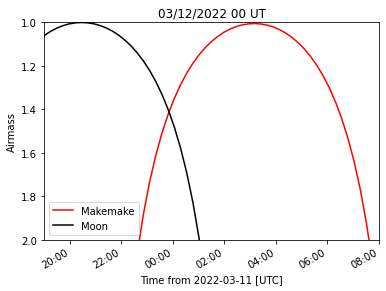

In [4]:
fig=plt.figure()

plot_airmass(target, obs, observe_time,style_kwargs=makemake_styles,max_airmass=2)
plot_airmass(Moon, obs, observe_time,style_kwargs=Moon_styles,max_airmass=2)
plt.legend()
plt.title("03/12/2022 00 UT")
plt.show()

Let's just plot the airmass of the target with twilight and evening shading with the elevation plotted on the right

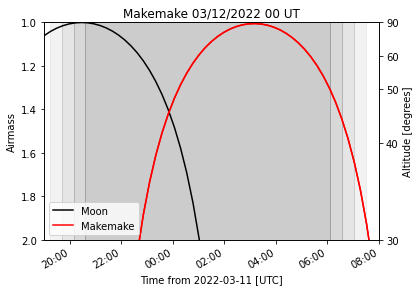

In [5]:
fig=plt.figure()

plot_airmass(Moon, obs, observe_time,style_kwargs=Moon_styles,max_airmass=2)
plot_airmass(target, obs, observe_time,style_kwargs=makemake_styles,max_airmass=2)
plt.legend(loc=3)
# replot MakeMake with altitude_yaxis=True as altitude_yaxis=True and the plotting legend/labels do not seem to interact well
# also doing the brightness shading here as it makes sense to just stick it at the end
plot_airmass(target, obs, observe_time, brightness_shading=True, altitude_yaxis=True, max_airmass=2, style_kwargs=makemake_styles)
plt.title("Makemake 03/12/2022 00 UT")
plt.savefig('makemake_twilight_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

What is the azimuth and altitude of our target across the night?

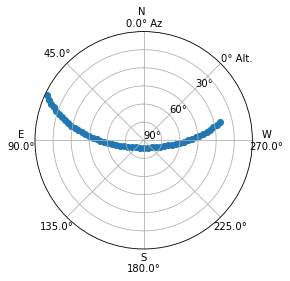

In [6]:
fig=plt.figure()
plot_sky(target, obs, observe_time)

where are the targets in azimuth and elevation of the target at this given time?

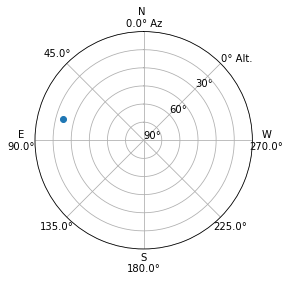

In [7]:
time = Time('2022-03-11 22:00')
fig=plt.figure()
plot_sky(target, obs, time)

How far will the target move from the start of the run to the end?

In [8]:

start_of_run=SkyCoord('13 15 38.92 +22 45 51.7', unit=(u.hourangle, u.deg))
end_of_run=SkyCoord('13 15 24.39 +22 48 02.6', unit=(u.hourangle, u.deg))
sep = start_of_run.separation(end_of_run)
sep.arcminute

3.9970135300461926

Let's take a look at the PanSTARRS cutouts and see if we have to worry about our object going near bright stars or crossing over stars

https://ps1images.stsci.edu/cgi-bin/ps1cutouts
